In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\train_2017.csv',parse_dates=["date"],
                  usecols=[1, 2, 3, 4, 5],dtype={'onpromotion': bool})
test = pd.read_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\test.csv',usecols=[0, 1, 2, 3, 4],
    dtype={'onpromotion': bool},parse_dates=["date"])

In [10]:
cv=train[(train['date']>=pd.datetime(2017,8,1))&(train['date']<=pd.datetime(2017,8,15))].copy()

In [11]:
store_all=cv['store_nbr'].unique()
item_all=cv['item_nbr'].unique()
date_all=cv['date'].unique()
cv.set_index([ 'store_nbr', 'item_nbr','date'], inplace=True)

cv_=cv.reindex(
    pd.MultiIndex.from_product((store_all,item_all,date_all),names=['store_nbr','item_nbr','date'])
)



In [12]:
cv_sales=cv_[['unit_sales']].unstack(level=-1)

In [13]:
cv_sales

unit_sales                                              \
date               2017-08-01 2017-08-02 2017-08-03 2017-08-04 2017-08-05   
store_nbr item_nbr                                                          
1         96995           NaN   0.693147   1.098612        NaN        NaN   
          99197           NaN        NaN        NaN        NaN   0.693147   
          103501          NaN        NaN        NaN        NaN        NaN   
          103520     1.386294   0.693147   1.098612   1.386294        NaN   
          103665     1.609438   1.098612   1.098612   2.197225   1.386294   
          105574     2.197225   2.197225   1.945910   1.791759   2.079442   
          105575     2.708050   2.197225   2.995732   2.708050   1.791759   
          105576          NaN        NaN        NaN        NaN        NaN   
          105577          NaN        NaN   0.693147        NaN        NaN   
          105693     0.693147        NaN        NaN        NaN        NaN   
          105737     0.693147        NaN        NaN   1.098612   0.693147   
          105857     1.945910   1.791759   1.609438   1.945910   2.302585   
          106716     1.791759   0.693147   1.609438   0.693147   1.098612   
          108079     1.098612        NaN        NaN        NaN   1.098612   
          108634          NaN        NaN        NaN        NaN        NaN   
          108696     0.693147   1.386294   1.098612   0.693147   1.098612   
          108698          NaN        NaN   0.693147   0.693147   0.693147   
          108701          NaN   1.098612   0.693147   1.098612   0.693147   
          108786     1.791759   2.197225   1.098612   1.098612   0.693147   
          108797     1.098612   1.791759   1.098612   1.386294   0.693147   
          108831          NaN        NaN        NaN        NaN        NaN   
          108833          NaN        NaN        NaN        NaN        NaN   
          108862          NaN   1.386294        NaN   0.693147   0.693147   
          108952          NaN        NaN        NaN        NaN   1.098612   
          111223     2.772589   2.708050   1.609438        NaN   2.484907   
          111397          NaN   1.098612        NaN   1.098612   1.609438   
          112830     1.945910   1.791759   1.386294        NaN        NaN   
          114778     0.693147   1.386294   0.693147   2.564949   1.098612   
          114790     1.609438   1.945910   0.693147   1.386294   1.386294   
          114799          NaN        NaN   1.386294   1.098612   0.693147   
...                       ...        ...        ...        ...        ...   
54        2116238         NaN        NaN        NaN        NaN        NaN   
          2116416    1.386294        NaN        NaN        NaN   0.693147   
          2118662         NaN        NaN        NaN        NaN        NaN   
          2120723         NaN        NaN        NaN        NaN        NaN   
          2121610         NaN        NaN        NaN        NaN        NaN   
          2121690         NaN        NaN        NaN        NaN        NaN   
          2122188         NaN        NaN        NaN        NaN        NaN   
          2122676         NaN        NaN        NaN        NaN        NaN   
          2122818         NaN        NaN        NaN        NaN        NaN   
          2122868         NaN        NaN        NaN        NaN        NaN   
          2122947         NaN        NaN        NaN        NaN        NaN   
          2123036         NaN        NaN        NaN        NaN        NaN   
          2123209         NaN        NaN        NaN        NaN        NaN   
          2123410         NaN        NaN        NaN        NaN        NaN   
          2123463         NaN        NaN        NaN        NaN        NaN   
          2123468         NaN        NaN        NaN        NaN        NaN   
          2123711         NaN        NaN        NaN        NaN        NaN   
          2123727         NaN        NaN        NaN        NaN        NaN   
          21237

In [14]:
cv_sales_fillna=cv_sales.fillna(0)

In [15]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
pca.fit(cv_sales_fillna.values)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca.components_

array([[ 0.27047007,  0.2695539 ,  0.24582262,  0.25799628,  0.27677075,
         0.28504739,  0.25730725,  0.24650986,  0.24779642,  0.23443118,
         0.25815064,  0.2545535 ,  0.26435722,  0.25030708,  0.24905611]])

In [19]:
cv_sales_fillna_pca=pca.transform(cv_sales_fillna.values)

In [38]:
cv_sales_fillna_pca_ini=pca.fit_transform(np.expm1(cv_sales_fillna.values))

In [29]:
cv_sales_fillna_pca[:30]

array([[-2.0708659 ],
       [-2.53934699],
       [-3.28610296],
       [-0.89124503],
       [ 0.83103856],
       [ 3.10104423],
       [ 5.95851822],
       [-3.28610296],
       [-1.60361483],
       [-2.13452924],
       [-0.69328152],
       [ 3.07120242],
       [ 1.44965453],
       [-1.89867488],
       [-3.28610296],
       [ 0.30578409],
       [-1.48246467],
       [-0.62192422],
       [ 1.37239437],
       [ 1.63599603],
       [-3.28610296],
       [-3.28610296],
       [-1.10494712],
       [-0.75277945],
       [ 3.43723208],
       [-1.35053504],
       [ 0.09440892],
       [ 0.94619037],
       [ 1.34575054],
       [-1.09540621]])

In [31]:
cv_sales_fillna_pca[-30:]

array([[-3.28610296],
       [-1.14896531],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296],
       [-3.28610296]])

In [34]:
cv_sales_fillna_pca.T[0]

array([-2.0708659 , -2.53934699, -3.28610296, ..., -3.28610296,
       -3.28610296, -3.28610296])

In [35]:
cv_sales_fillna_pca.T

array([[-2.0708659 , -2.53934699, -3.28610296, ..., -3.28610296,
        -3.28610296, -3.28610296]])

In [ ]:
cv_sales_fillna_pca

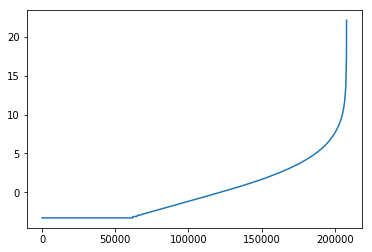

In [36]:
plt.plot(range(len(cv_sales_fillna_pca)),np.sort(cv_sales_fillna_pca.T[0]))

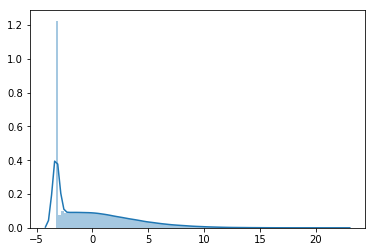

In [73]:
sns.distplot(cv_sales_fillna_pca.T[0],bins=100,kde=True)

In [46]:
cv_sales_fillna_pca_2log=pca.fit_transform(np.log1p(cv_sales_fillna.values))

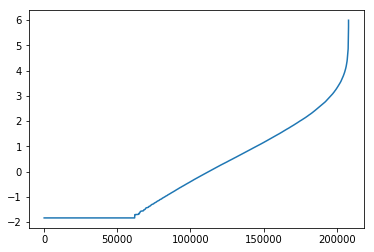

In [47]:
plt.plot(range(len(cv_sales_fillna_pca)),np.sort(cv_sales_fillna_pca_2log.T[0]))

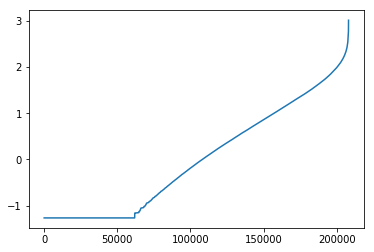

In [48]:
cv_sales_fillna_pca_3log=pca.fit_transform(np.log1p(np.log1p(cv_sales_fillna.values)))
plt.plot(range(len(cv_sales_fillna_pca)),np.sort(cv_sales_fillna_pca_3log.T[0]))

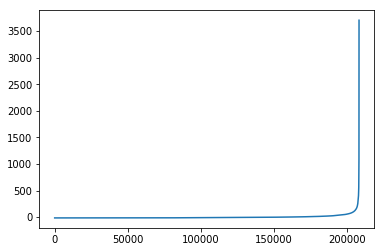

In [39]:
plt.plot(range(len(cv_sales_fillna_pca_ini)),np.sort(cv_sales_fillna_pca_ini.T[0]))

In [26]:
np.sort(cv_sales_fillna_pca)

array([[-2.0708659 ],
       [-2.53934699],
       [-3.28610296],
       ..., 
       [-3.28610296],
       [-3.28610296],
       [-3.28610296]])

In [50]:
item = pd.read_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\items.csv')

In [51]:
perishable_item_list=item[item['perishable']==1]['item_nbr'].unique()

In [52]:
len(perishable_item_list) #4000VS1000

986

In [66]:
perishable_cv_sales=cv_sales[list(cv_sales.index.map(lambda x : x[1] in perishable_item_list))]

In [67]:
perishable_cv_sales

unit_sales                                              \
date               2017-08-01 2017-08-02 2017-08-03 2017-08-04 2017-08-05   
store_nbr item_nbr                                                          
1         103665     1.609438   1.098612   1.098612   2.197225   1.386294   
          108696     0.693147   1.386294   1.098612   0.693147   1.098612   
          108698          NaN        NaN   0.693147   0.693147   0.693147   
          108701          NaN   1.098612   0.693147   1.098612   0.693147   
          108831          NaN        NaN        NaN        NaN        NaN   
          108833          NaN        NaN        NaN        NaN        NaN   
          122095     0.693147   1.386294   1.098612   1.098612   1.098612   
          123347          NaN   1.386294   0.693147        NaN   0.693147   
          127547     2.079442   2.397895   1.098612        NaN   1.386294   
          129635     2.995732   3.091042   2.397895   2.944439   2.995732   
          153239     1.386294        NaN   1.386294   1.386294   1.609438   
          153395     0.693147   0.693147   0.693147   0.693147        NaN   
          153398     0.693147   1.098612   1.098612   1.098612   0.693147   
          158680     1.386294   1.098612   1.098612        NaN        NaN   
          158842          NaN   0.693147        NaN   0.693147        NaN   
          159156     3.065911   2.241348   2.356221   3.349343   2.015303   
          164088          NaN   1.945910   0.693147   1.791759   1.386294   
          165718     0.693147   1.098612   1.386294   0.693147        NaN   
          173113     1.098612   0.693147        NaN   1.098612        NaN   
          179615     1.945910   2.564949   2.397895   2.197225   1.791759   
          205209     2.264676   1.927746   1.760269   2.802936   1.689727   
          205486     1.609438   1.098612   1.386294   1.609438   1.609438   
          208384     2.890372   2.708050   2.564949   2.564949   2.564949   
          208386     1.791759   1.386294        NaN   1.609438   0.693147   
          208426     1.386294   0.693147   0.693147        NaN   1.386294   
          208539          NaN        NaN        NaN        NaN   1.077048   
          215370     1.609438   0.693147   1.386294   1.386294   0.693147   
          220613          NaN   1.386294   0.693147   1.609438   1.609438   
          227111     0.693147   2.397895   0.693147   2.079442   1.609438   
          227728          NaN   1.098612   1.386294   0.693147   1.791759   
...                       ...        ...        ...        ...        ...   
54        2033699         NaN        NaN        NaN        NaN        NaN   
          2033805    1.609438   0.693147   1.098612   1.791759   2.995732   
          2034104         NaN   0.693147   2.302585   2.302585   1.945910   
          2036460    2.564949   1.098612   0.693147   1.791759   1.386294   
          2036465         NaN        NaN        NaN        NaN        NaN   
          2036574    2.079442   1.386294   1.386294   1.098612   1.791759   
          2036618         NaN        NaN        NaN        NaN        NaN   
          2037487         NaN        NaN        NaN        NaN        NaN   
          2040637         NaN        NaN        NaN        NaN        NaN   
          2042210         NaN        NaN        NaN        NaN        NaN   
          2049081         NaN        NaN        NaN        NaN        NaN   
          2053590         NaN        NaN        NaN        NaN        NaN   
          2053610         NaN        NaN        NaN        NaN        NaN   
          2053614         NaN   0.693147   0.693147   0.693147   1.791759   
          2056549         NaN        NaN        NaN        NaN        NaN   
          2057231         NaN        NaN        NaN        NaN        NaN   
          2081050         NaN        NaN        NaN        NaN        NaN   
          2081056    1.945910   2.079442   0.693147   1.386294   1.098612   
          20810

In [68]:
perishable_cv_sales_fillna=perishable_cv_sales.fillna(0)

In [337]:
np.expm1(perishable_cv_sales_fillna).to_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\tmp\perishable_cv_sales_fillna.csv')

In [69]:
perishable_cv_sales_fillna_pca=pca.fit_transform(perishable_cv_sales_fillna.values)

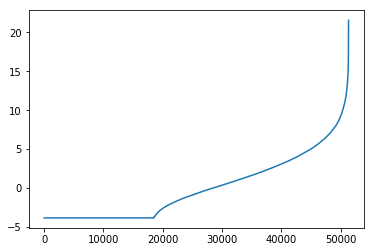

In [70]:
plt.plot(range(len(perishable_cv_sales_fillna_pca)),np.sort(perishable_cv_sales_fillna_pca.T[0]))

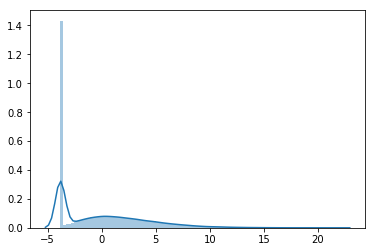

In [72]:
sns.distplot(perishable_cv_sales_fillna_pca.T[0],bins=100,kde=True)

In [57]:
perishable_train[train['item_nbr'].map(lambda x : x in perishable_item_list)]

In [53]:
train

,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2017-01-01,25,99197,0.693147,False
1,2017-01-01,25,103665,2.079442,False
2,2017-01-01,25,105574,0.693147,False
3,2017-01-01,25,105857,1.609438,False
4,2017-01-01,25,106716,1.098612,False
5,2017-01-01,25,108698,1.098612,False
6,2017-01-01,25,108786,0.693147,False
7,2017-01-01,25,108797,0.693147,False
8,2017-01-01,25,108862,0.693147,False
9,2017-01-01,25,108952,1.098612,False


In [75]:
cv_sales_ini=np.expm1(cv_sales)

In [77]:
cv_sales_ini.to_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\tmp\cv_sales_ini.csv')

In [78]:
cv_sales_ini.fillna(0).to_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\tmp\cv_sales_ini_fillna.csv')

In [79]:
cv_sales_ini_mean=cv_sales_ini.fillna(0).mean()

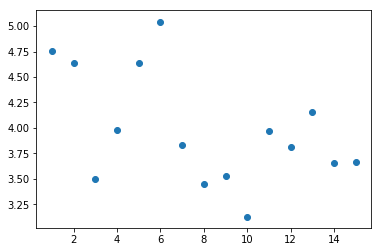

In [85]:
plt.scatter(range(1,16),cv_sales_ini_mean.values)

In [86]:
cv2=train[(train['date']>=pd.datetime(2017,7,15))&(train['date']<=pd.datetime(2017,7,31))].copy()

store_all=cv2['store_nbr'].unique()
item_all=cv2['item_nbr'].unique()
date_all=cv2['date'].unique()
cv2.set_index([ 'store_nbr', 'item_nbr','date'], inplace=True)

cv2_=cv2.reindex(
    pd.MultiIndex.from_product((store_all,item_all,date_all),names=['store_nbr','item_nbr','date'])
)

cv2_sales=cv2_[['unit_sales']].unstack(level=-1)

In [88]:
cv2_sales_ini=np.expm1(cv2_sales)
cv2_sales_ini_mean=cv2_sales_ini.fillna(0).mean()

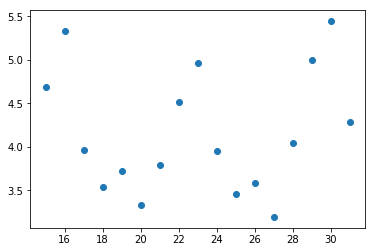

In [95]:
plt.scatter(range(15,32),cv2_sales_ini_mean.values)

In [96]:
pred=pd.read_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\public\lgb.csv')

In [100]:
pre=test.copy()
pre['unit_sales']=pred['unit_sales']

In [102]:
pre_sales=pre.set_index(['store_nbr', 'item_nbr', 'date'])['unit_sales'].unstack(level=-1)

In [105]:
pre_sales_mean=pre_sales.mean()

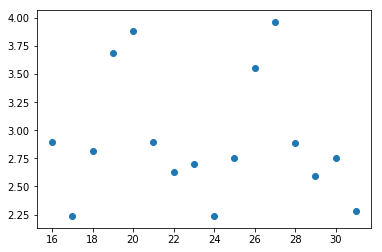

In [108]:
plt.scatter(range(16,32),pre_sales_mean.values)

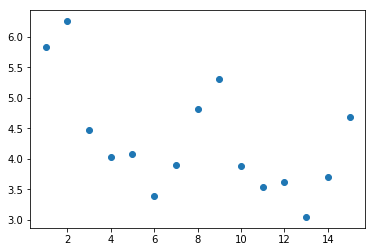

In [110]:
cv3=train[(train['date']>=pd.datetime(2017,7,1))&(train['date']<=pd.datetime(2017,7,15))].copy()

store_all=cv3['store_nbr'].unique()
item_all=cv3['item_nbr'].unique()
date_all=cv3['date'].unique()
cv3.set_index([ 'store_nbr', 'item_nbr','date'], inplace=True)

cv3_=cv3.reindex(
    pd.MultiIndex.from_product((store_all,item_all,date_all),names=['store_nbr','item_nbr','date'])
)

cv3_sales=cv3_[['unit_sales']].unstack(level=-1)

cv3_sales_ini=np.expm1(cv3_sales)
cv3_sales_ini_mean=cv3_sales_ini.fillna(0).mean()

plt.scatter(range(1,16),cv3_sales_ini_mean.values)

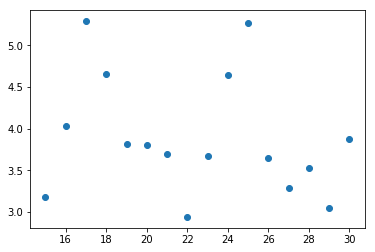

In [112]:
cv4=train[(train['date']>=pd.datetime(2017,6,15))&(train['date']<=pd.datetime(2017,6,30))].copy()

store_all=cv4['store_nbr'].unique()
item_all=cv4['item_nbr'].unique()
date_all=cv4['date'].unique()
cv4.set_index([ 'store_nbr', 'item_nbr','date'], inplace=True)

cv4_=cv4.reindex(
    pd.MultiIndex.from_product((store_all,item_all,date_all),names=['store_nbr','item_nbr','date'])
)

cv4_sales=cv4_[['unit_sales']].unstack(level=-1)

cv4_sales_ini=np.expm1(cv4_sales)
cv4_sales_ini_mean=cv4_sales_ini.fillna(0).mean()

plt.scatter(range(15,31),cv4_sales_ini_mean.values)

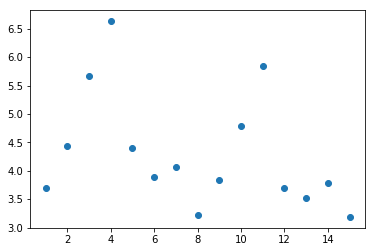

In [113]:
cv5=train[(train['date']>=pd.datetime(2017,6,1))&(train['date']<=pd.datetime(2017,6,15))].copy()

store_all=cv5['store_nbr'].unique()
item_all=cv5['item_nbr'].unique()
date_all=cv5['date'].unique()
cv5.set_index([ 'store_nbr', 'item_nbr','date'], inplace=True)

cv5_=cv5.reindex(
    pd.MultiIndex.from_product((store_all,item_all,date_all),names=['store_nbr','item_nbr','date'])
)

cv5_sales=cv5_[['unit_sales']].unstack(level=-1)

cv5_sales_ini=np.expm1(cv5_sales)
cv5_sales_ini_mean=cv5_sales_ini.fillna(0).mean()
plt.scatter(range(1,16),cv5_sales_ini_mean.values)

In [114]:
train_sales=train.set_index(
    ["store_nbr", "item_nbr", "date"])[["unit_sales"]].unstack(
        level=-1).fillna(0)

In [116]:
train_sales_mean=train_sales.mean()

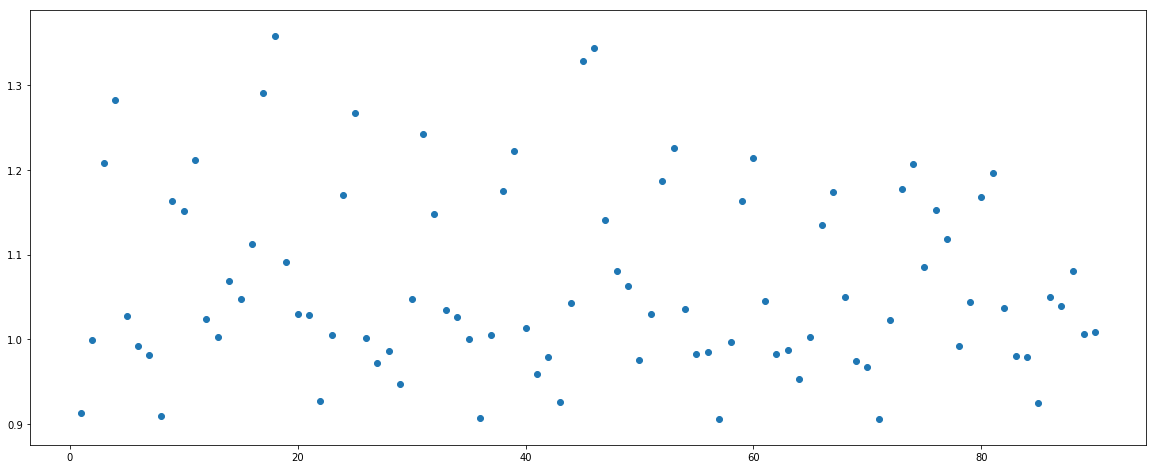

In [125]:
plt.figure(figsize=(20,8))
plt.scatter(range(1,91),train_sales_mean[-90:].values)

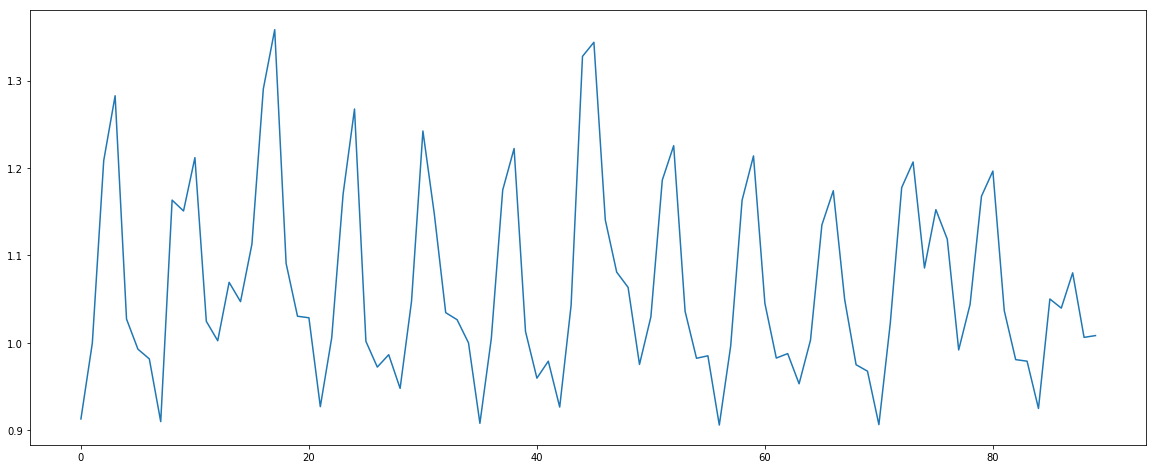

In [126]:
plt.figure(figsize=(20,8))
plt.plot(train_sales_mean.values[-90:])

In [132]:
train_2016=pd.read_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\train.csv',parse_dates=["date"],
                  usecols=[1, 2, 3, 4, 5],dtype={'onpromotion': bool},skiprows=range(1, 66458909))

In [133]:
train_2016=train_2016[(train_2016.date<pd.datetime(2016,10,1))&(train_2016.date>pd.datetime(2016,4,1))]

In [134]:
train_2016_sales=train_2016.set_index(
    ["store_nbr", "item_nbr", "date"])[["unit_sales"]].unstack(
        level=-1).fillna(0)

In [135]:
train_2016_sales_mean=train_2016_sales.mean()

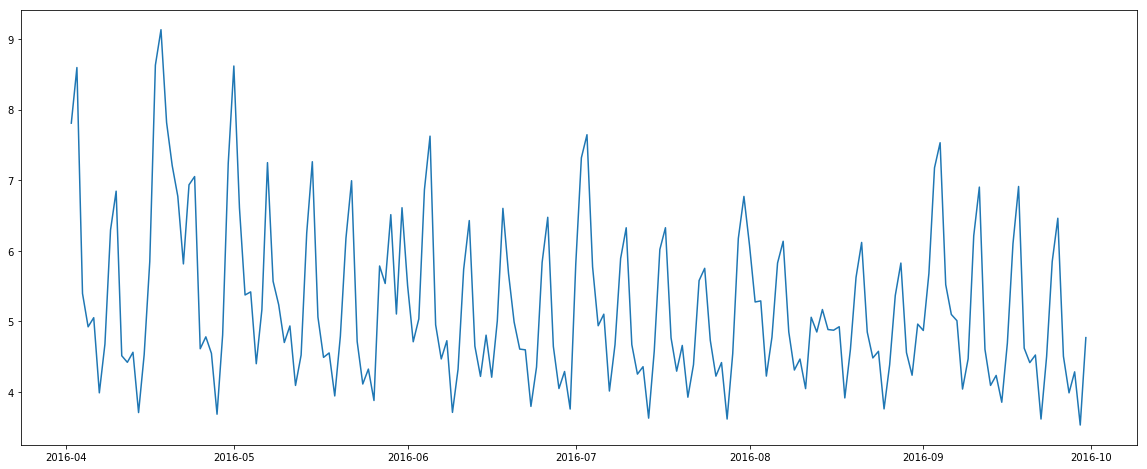

In [137]:
plt.figure(figsize=(20,8))
plt.plot(pd.date_range(start=pd.datetime(2016,4,2),end=pd.datetime(2016,9,30)),train_2016_sales_mean.values)

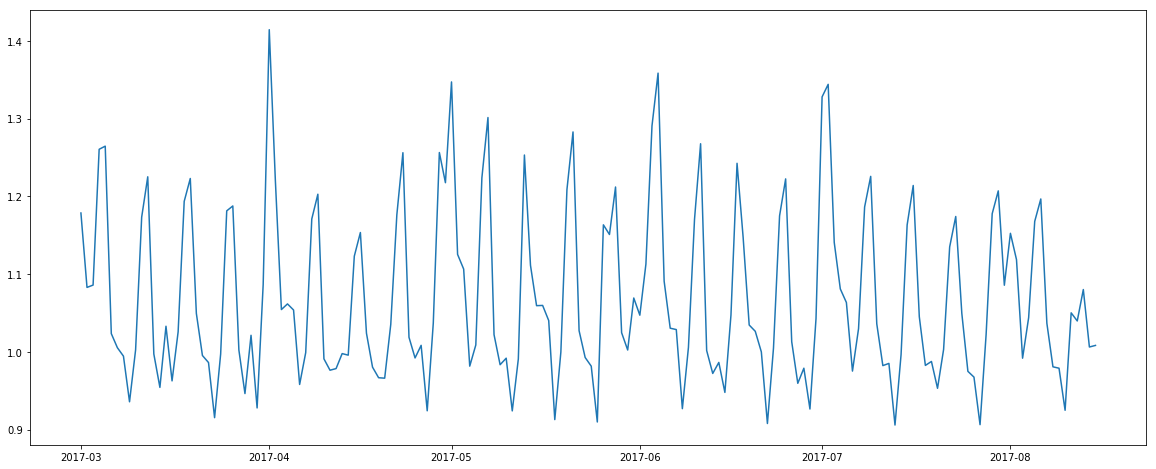

In [142]:
plt.figure(figsize=(20,8))
plt.plot(pd.date_range(start=pd.datetime(2017,3,1),end=pd.datetime(2017,8,15)),train_sales_mean.values[-168:])

In [201]:
sales_201608=train_2016_sales_mean.reset_index()[(train_2016_sales_mean.reset_index()['date']>=pd.datetime(2016,7,1)) & (train_2016_sales_mean.reset_index()['date']<=pd.datetime(2016,8,15))][0].values

In [216]:
sales_201708=train_sales_mean.reset_index()[(train_sales_mean.reset_index()['date']>=pd.datetime(2017,7,1)) & (train_sales_mean.reset_index()['date']<=pd.datetime(2017,8,15))][0].values

c:\users\yechao\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


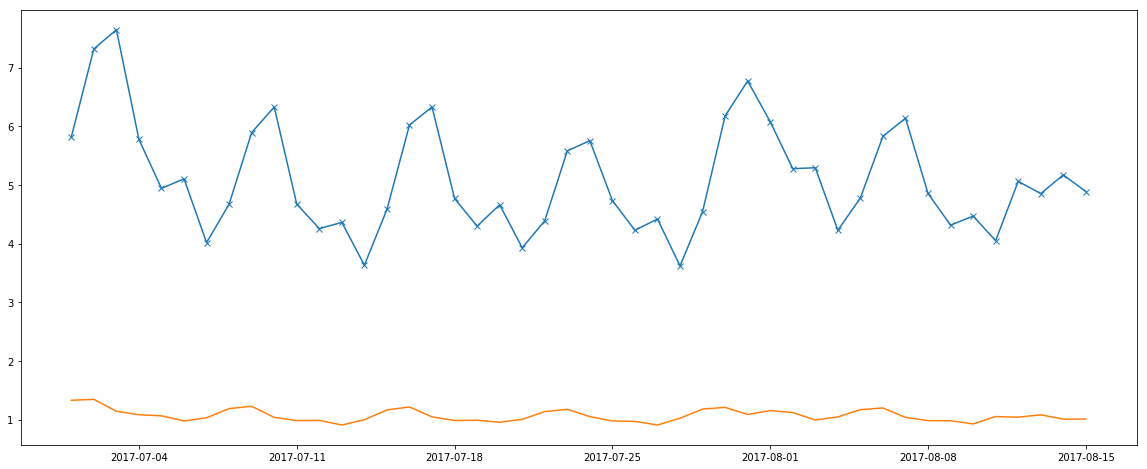

In [220]:
plt.figure(figsize=(20,8))
plt.plot(pd.date_range(start=pd.datetime(2017,7,1),end=pd.datetime(2017,8,15)),sales_201608,"x-")
plt.plot(pd.date_range(start=pd.datetime(2017,7,1),end=pd.datetime(2017,8,15)),sales_201708)
plt.legend(loc='best')

In [141]:
len(train_sales_mean)

227

In [143]:
train_sales.shape #至少60*54条上新没预测对，后来不出现在test中的就略了

(167515, 227)

In [148]:
train_set=set(list(train_sales.index))
cv_set=set(list(cv_sales.index))
cv2_set=set(list(cv2_sales.index))
cv3_set=set(list(cv3_sales.index))
cv4_set=set(list(cv4_sales.index))

In [149]:
len(train_set-cv_set)

6158

In [150]:
len(train_set-cv2_set)

6168

In [151]:
len(train_set-cv3_set)

5689

In [152]:
len(train_set-cv4_set)

5421

In [154]:
test_set=set(list(test.set_index([ 'store_nbr', 'item_nbr']).index))

In [155]:
len(train_set-test_set)

6551

In [156]:
len(cv_set-train_set)

46759

In [159]:
len(cv2_set-train_set)

45203

In [160]:
len(cv3_set-train_set)

45210

In [158]:
len(test_set-train_set)

49690

In [ ]:
cv2_=train[(train['date']>=pd.datetime(2017,7,15))&(train['date']<=pd.datetime(2017,7,31))].copy()
cv_=train[(train['date']>=pd.datetime(2017,8,1))&(train['date']<=pd.datetime(2017,8,15))].copy()
cv3_=train[(train['date']>=pd.datetime(2017,7,1))&(train['date']<=pd.datetime(2017,7,15))].copy()

In [165]:
cv_set_ini=set(list(cv.reset_index(['date']).index))
cv2_set_ini=set(list(cv2.reset_index(['date']).index))
cv3_set_ini=set(list(cv3.reset_index(['date']).index))

In [166]:
len(train_set-cv_set_ini)

21268

In [167]:
len(train_set-cv2_set_ini)

19807

In [168]:
len(train_set-cv3_set_ini)

19778

In [169]:
len(cv2_set_ini-cv_set_ini)

4913

In [170]:
len(cv_set_ini-cv2_set_ini)

3452

In [172]:
len(cv_set_ini&cv2_set_ini)

142795

In [175]:
len(cv2_set_ini-cv3_set_ini)

3518

In [176]:
len(-cv_set_ini-cv2_set_ini-cv3_set_ini)

2148

In [181]:
cv_new=set(list(train_sales[train_sales.iloc[:,:197].sum(axis=1)==0].index))

In [182]:
len(cv_new)

1322

In [171]:
len(cv_set_ini)

146247

In [157]:
train_sales

unit_sales                                              \
date               2017-01-01 2017-01-02 2017-01-03 2017-01-04 2017-01-05   
store_nbr item_nbr                                                          
1         96995           0.0   0.000000   0.000000   0.000000   0.000000   
          99197           0.0   0.000000   1.386294   0.693147   0.693147   
          103520          0.0   0.693147   1.098612   0.000000   1.098612   
          103665          0.0   0.000000   0.000000   1.386294   1.098612   
          105574          0.0   0.000000   1.791759   2.564949   2.302585   
          105575          0.0   1.386294   2.564949   2.772589   2.995732   
          105577          0.0   0.693147   1.098612   0.693147   0.693147   
          105693          0.0   0.000000   0.693147   0.693147   0.000000   
          105737          0.0   0.693147   0.693147   0.693147   1.098612   
          105857          0.0   0.000000   2.197225   1.098612   2.197225   
          106716          0.0   0.000000   1.098612   1.098612   1.098612   
          108079          0.0   1.098612   1.098612   0.000000   1.098612   
          108634          0.0   0.000000   1.386294   0.693147   0.000000   
          108696          0.0   0.000000   0.000000   0.000000   0.000000   
          108698          0.0   0.000000   1.945910   1.791759   0.000000   
          108701          0.0   0.000000   1.098612   0.693147   0.693147   
          108786          0.0   0.693147   1.609438   0.000000   1.386294   
          108797          0.0   1.386294   1.609438   1.609438   1.386294   
          108831          0.0   0.000000   0.000000   0.000000   0.000000   
          108862          0.0   0.693147   0.693147   0.693147   0.693147   
          108952          0.0   0.693147   1.386294   0.693147   0.693147   
          111223          0.0   2.079442   2.639057   1.791759   2.397895   
          111397          0.0   0.000000   0.000000   0.693147   1.609438   
          112830          0.0   0.000000   1.098612   1.386294   1.386294   
          114778          0.0   0.000000   0.000000   0.000000   0.000000   
          114790          0.0   0.693147   1.945910   2.079442   1.945910   
          114799          0.0   1.098612   0.000000   1.386294   0.693147   
          114800          0.0   0.693147   1.791759   2.079442   1.098612   
          115267          0.0   0.693147   1.386294   0.693147   1.791759   
          115611          0.0   0.000000   2.079442   2.484907   2.079442   
...                       ...        ...        ...        ...        ...   
54        2081056         0.0   0.000000   0.000000   0.000000   0.000000   
          2081064         0.0   0.000000   0.000000   0.000000   0.000000   
          2081095         0.0   0.000000   0.000000   0.000000   0.000000   
          2081142         0.0   0.000000   0.000000   0.000000   0.000000   
          2081161         0.0   0.000000   0.000000   0.000000   0.000000   
          2083837         0.0   0.000000   0.000000   0.000000   0.000000   
          2083859         0.0   0.000000   0.000000   0.000000   0.000000   
          2084278         0.0   0.000000   0.000000   0.000000   0.000000   
          2084557         0.0   0.000000   0.000000   0.000000   0.000000   
          2086882         0.0   0.000000   0.000000   0.000000   0.000000   
          2087374         0.0   0.000000   0.000000   0.000000   0.000000   
          2087409         0.0   0.000000   0.000000   0.000000   0.000000   
          2087543         0.0   0.000000   0.000000   0.000000   0.000000   
          2087567         0.0   0.000000   0.000000   0.000000   0.000000   
          2087933         0.0   0.000000   0.000000   0.000000   0.000000   
          2087978         0.0   0.000000   0.000000   0.000000   0.000000   
          2088922         0.0   0.000000   0.000000   0.000000   0.000000   
          2089036         0.0   0.000000   0.000000   0.000000   0.000000   
          20893

In [224]:
train[(train['item_nbr']==2088922)&(train['store_nbr']==54)]

,date,store_nbr,item_nbr,unit_sales,onpromotion
15362817,2017-05-27,54,2088922,2.833213,False
15475107,2017-05-28,54,2088922,2.564949,False
15579205,2017-05-29,54,2088922,2.484907,False
15682588,2017-05-30,54,2088922,2.772589,False
15789095,2017-05-31,54,2088922,2.484907,False
15895162,2017-06-01,54,2088922,2.302585,False
16002925,2017-06-02,54,2088922,2.564949,False
16118921,2017-06-03,54,2088922,2.772589,False
16235996,2017-06-04,54,2088922,2.944439,False
16342342,2017-06-05,54,2088922,2.079442,False


In [244]:
transactions=pd.read_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\transactions.csv',parse_dates=["date"])

In [245]:
transactions2017=transactions[transactions['date']>pd.datetime(2017,1,1)]

In [246]:
date=transactions2017.date.unique()
store=transactions2017.store_nbr.unique()

transactions2017_=transactions2017.set_index(['date','store_nbr']).reindex(
    pd.MultiIndex.from_product((date,store),names=['date','store_nbr'])
)

In [257]:
transactions2017_.isnull().sum()

transactions    108
dtype: int64

In [259]:
transactions2017_[transactions2017_.isnull().values]

,,transactions
date,store_nbr,
2017-01-02,52,NaN
2017-01-03,52,NaN
2017-01-04,52,NaN
2017-01-05,52,NaN
2017-01-06,52,NaN
2017-01-07,52,NaN
2017-01-08,52,NaN
2017-01-09,52,NaN
2017-01-10,52,NaN


In [263]:
transactions2017_[transactions2017_.isnull().values].reset_index(['store_nbr'])['store_nbr'].unique()

array([52], dtype=int64)

##  52商店4.19开张

In [266]:
train52=train[train['store_nbr']==52].copy()

In [267]:
train52

,date,store_nbr,item_nbr,unit_sales,onpromotion
11407057,2017-04-20,52,96995,0.693147,False
11407058,2017-04-20,52,103520,2.079442,False
11407059,2017-04-20,52,103665,2.772589,False
11407060,2017-04-20,52,105574,3.465736,False
11407061,2017-04-20,52,105575,3.218876,False
11407062,2017-04-20,52,105693,0.693147,False
11407063,2017-04-20,52,105737,1.609438,False
11407064,2017-04-20,52,105857,0.693147,False
11407065,2017-04-20,52,106716,3.218876,False
11407066,2017-04-20,52,108696,0.693147,False


In [271]:
len(train52['item_nbr'].unique())

3481

In [272]:
len(train.loc[train['store_nbr']==53,'item_nbr'].unique())

3390

In [273]:
train

,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2017-01-01,25,99197,0.693147,False
1,2017-01-01,25,103665,2.079442,False
2,2017-01-01,25,105574,0.693147,False
3,2017-01-01,25,105857,1.609438,False
4,2017-01-01,25,106716,1.098612,False
5,2017-01-01,25,108698,1.098612,False
6,2017-01-01,25,108786,0.693147,False
7,2017-01-01,25,108797,0.693147,False
8,2017-01-01,25,108862,0.693147,False
9,2017-01-01,25,108952,1.098612,False


In [275]:
def abnormal_value_mark(df):
    #形式为带空值的日销量df
    df=df.copy()
    df_grouped=df.groupby(['store_nbr','item_nbr'])
    df_grouped['unit_sales'].map(lambda x:x=-99 if x >15*(df_grouped['unit_sales'].mean()))
    abnormal=df[df['unit_sales']==-99]
    
    return abnormal

abnormal_train=abnormal_value_mark(train)

SyntaxError: invalid syntax (<ipython-input-275-7884c004f4d7>, line 5)

In [ ]:
train.copy


In [276]:
%store train

Stored 'train' (DataFrame)


In [277]:
%store train_sales

Stored 'train_sales' (DataFrame)


In [280]:
train[train['item_nbr']==264299]

,date,store_nbr,item_nbr,unit_sales,onpromotion
105,2017-01-01,25,264299,0.693147,False
3345,2017-01-02,2,264299,1.945910,False
5945,2017-01-02,3,264299,3.401197,False
8774,2017-01-02,4,264299,2.397895,False
11217,2017-01-02,5,264299,2.079442,False
13445,2017-01-02,6,264299,2.564949,False
16088,2017-01-02,7,264299,1.945910,False
18554,2017-01-02,8,264299,2.564949,False
21372,2017-01-02,9,264299,4.219508,False
23716,2017-01-02,10,264299,3.988984,False


In [302]:
cv_sales_ini.swaplevel().loc[264299,:].to_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\tmp\cv_sales_ini264299.csv')

In [299]:
cv_onpromotion=cv_[['onpromotion']].unstack(level=-1)

In [303]:
cv_onpromotion.swaplevel().loc[264299,:].to_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\tmp\cv_onpromotion264299.csv')

In [306]:
train_sales.swaplevel().loc[264299,:].to_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\tmp\train_sales264299.csv')

In [309]:
np.expm1(train_sales.swaplevel().loc[264299,:]).to_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\tmp\train_sales_ini264299.csv')

In [310]:
test

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False
5,125497045,2017-08-16,1,105574,False
6,125497046,2017-08-16,1,105575,False
7,125497047,2017-08-16,1,105576,False
8,125497048,2017-08-16,1,105577,False
9,125497049,2017-08-16,1,105693,False


In [311]:
baseline=pd.read_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\public\lgb.csv')

In [312]:
baseline

,id,unit_sales
0,125497040,0.2011
1,125497041,0.3778
2,125497042,0.0000
3,125497043,1.1055
4,125497044,2.0475
5,125497045,6.7763
6,125497046,10.4622
7,125497047,0.0000
8,125497048,0.5731
9,125497049,0.3263


In [316]:
baseline_=pd.merge(test,baseline,on='id',how='left')

In [319]:
baseline_

,date,store_nbr,item_nbr,onpromotion,unit_sales
0,2017-08-16,1,96995,False,0.2011
1,2017-08-16,1,99197,False,0.3778
2,2017-08-16,1,103501,False,0.0000
3,2017-08-16,1,103520,False,1.1055
4,2017-08-16,1,103665,False,2.0475
5,2017-08-16,1,105574,False,6.7763
6,2017-08-16,1,105575,False,10.4622
7,2017-08-16,1,105576,False,0.0000
8,2017-08-16,1,105577,False,0.5731
9,2017-08-16,1,105693,False,0.3263


In [320]:
baseline_sales=baseline_.set_index([ 'store_nbr', 'item_nbr','date'])['unit_sales'].unstack(level=-1)
baseline_onpromotion=baseline_.set_index([ 'store_nbr', 'item_nbr','date'])['onpromotion'].unstack(level=-1)

In [323]:
baseline_sales.swaplevel().loc[264299,:].to_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\tmp\baseline_sales264299.csv')

In [324]:
baseline_onpromotion.swaplevel().loc[264299,:].to_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\tmp\baseline_onpromotion264299.csv')

In [326]:
train_onpromotion=train.set_index([ 'store_nbr', 'item_nbr','date'])['onpromotion'].unstack(level=-1)

In [327]:
train_onpromotion.swaplevel().loc[264299,:].to_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\tmp\train_onpromotion264299.csv')

In [330]:
test_onpromotion=test.set_index([ 'store_nbr', 'item_nbr','date'])['onpromotion'].unstack(level=-1)

In [331]:
test_onpromotion.to_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\tmp\test_onpromotion.csv')

In [335]:
train_onpromotion.to_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\tmp\train_onpromotion.csv')

In [336]:
np.expm1(train_sales).to_csv(r'C:\Python\kaggle\@ON-Favorita货物销量预测\data\tmp\train_sales.csv')

In [338]:
train_sales=np.expm1(train_sales)

In [341]:
train_sales.columns=train_sales.columns.get_level_values(1)

In [342]:
train_sales

date                2017-01-01  2017-01-02  2017-01-03  2017-01-04  \
store_nbr item_nbr                                                   
1         96995            0.0         0.0         0.0         0.0   
          99197            0.0         0.0         3.0         1.0   
          103520           0.0         1.0         2.0         0.0   
          103665           0.0         0.0         0.0         3.0   
          105574           0.0         0.0         5.0        12.0   
          105575           0.0         3.0        12.0        15.0   
          105577           0.0         1.0         2.0         1.0   
          105693           0.0         0.0         1.0         1.0   
          105737           0.0         1.0         1.0         1.0   
          105857           0.0         0.0         8.0         2.0   
          106716           0.0         0.0         2.0         2.0   
          108079           0.0         2.0         2.0         0.0   
          108634           0.0         0.0         3.0         1.0   
          108696           0.0         0.0         0.0         0.0   
          108698           0.0         0.0         6.0         5.0   
          108701           0.0         0.0         2.0         1.0   
          108786           0.0         1.0         4.0         0.0   
          108797           0.0         3.0         4.0         4.0   
          108831           0.0         0.0         0.0         0.0   
          108862           0.0         1.0         1.0         1.0   
          108952           0.0         1.0         3.0         1.0   
          111223           0.0         7.0        13.0         5.0   
          111397           0.0         0.0         0.0         1.0   
          112830           0.0         0.0         2.0         3.0   
          114778           0.0         0.0         0.0         0.0   
          114790           0.0         1.0         6.0         7.0   
          114799           0.0         2.0         0.0         3.0   
          114800           0.0         1.0         5.0         7.0   
          115267           0.0         1.0         3.0         1.0   
          115611           0.0         0.0         7.0        11.0   
...                        ...         ...         ...         ...   
54        2081056          0.0         0.0         0.0         0.0   
          2081064          0.0         0.0         0.0         0.0   
          2081095          0.0         0.0         0.0         0.0   
          2081142          0.0         0.0         0.0         0.0   
          2081161          0.0         0.0         0.0         0.0   
          2083837          0.0         0.0         0.0         0.0   
          2083859          0.0         0.0         0.0         0.0   
          2084278          0.0         0.0         0.0         0.0   
          2084557          0.0         0.0         0.0         0.0   
          2086882          0.0         0.0         0.0         0.0   
          2087374          0.0         0.0         0.0         0.0   
          2087409          0.0         0.0         0.0         0.0   
          2087543          0.0         0.0         0.0         0.0   
          2087567          0.0         0.0         0.0         0.0   
          2087933          0.0         0.0         0.0         0.0   
          2087978          0.0         0.0         0.0         0.0   
          2088922          0.0         0.0         0.0         0.0   
          2089036          0.0         0.0         0.0         0.0   
          2089339          0.0         0.0         0.0         0.0   
          2099230          0.0         0.0         0.0         0.0   
          2101795          0.0         0.0         0.0         0.0   
          2103250          0.0         0.0         0.0         0.0   
          2105347          0.0         0.0         0.0         0.0   
          2106464          0.0         0.0         0.0         0.0   
          

In [343]:
train_onpromotion

date               2017-01-01 2017-01-02 2017-01-03 2017-01-04 2017-01-05  \
store_nbr item_nbr                                                          
1         96995          None       None       None       None       None   
          99197          None       None      False      False      False   
          103520         None      False      False       None      False   
          103665         None       None       None      False      False   
          105574         None       None       True      False      False   
          105575         None      False      False      False      False   
          105577         None      False      False      False      False   
          105693         None       None      False      False       None   
          105737         None      False      False      False      False   
          105857         None       None      False      False      False   
          106716         None       None      False      False      False   
          108079         None      False      False       None      False   
          108634         None       None      False      False       None   
          108696         None       None       None       None       None   
          108698         None       None      False      False       None   
          108701         None       None      False      False      False   
          108786         None      False      False       None      False   
          108797         None      False      False      False      False   
          108831         None       None       None       None       None   
          108862         None      False      False      False      False   
          108952         None      False      False      False      False   
          111223         None      False      False      False      False   
          111397         None       None       None      False      False   
          112830         None       None      False      False      False   
          114778         None       None       None       None       None   
          114790         None      False      False      False      False   
          114799         None      False       None      False      False   
          114800         None      False      False      False      False   
          115267         None      False      False      False      False   
          115611         None       None      False      False      False   
...                       ...        ...        ...        ...        ...   
54        2081056        None       None       None       None       None   
          2081064        None       None       None       None       None   
          2081095        None       None       None       None       None   
          2081142        None       None       None       None       None   
          2081161        None       None       None       None       None   
          2083837        None       None       None       None       None   
          2083859        None       None       None       None       None   
          2084278        None       None       None       None       None   
          2084557        None       None       None       None       None   
          2086882        None       None       None       None       None   
          2087374        None       None       None       None       None   
          2087409        None       None       None       None       None   
          2087543        None       None       None       None       None   
          2087567        None       None       None       None       None   
          2087933        None       None       None       None       None   
          2087978        None       None       None       None       None   
          2088922        None       None       None       None       None   
          2089036        None       None       None       None       None   
          2089339        None       None       None       None       None

In [345]:
test_onpromotion_sum=test_onpromotion.sum(axis=1)

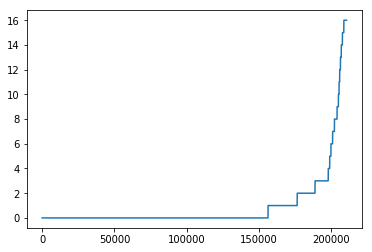

In [348]:
plt.plot(range(len(test_onpromotion_sum)),np.sort(test_onpromotion_sum))

In [352]:
(test_onpromotion_sum>8).sum()

6581

## 16万，1万打了3天以上的折,6600》8天+，11万没打折，4万打了1-3天

In [354]:
%store train_onpromotion

Stored 'train_onpromotion' (DataFrame)


In [355]:
train_onpromotion

date               2017-01-01 2017-01-02 2017-01-03 2017-01-04 2017-01-05  \
store_nbr item_nbr                                                          
1         96995          None       None       None       None       None   
          99197          None       None      False      False      False   
          103520         None      False      False       None      False   
          103665         None       None       None      False      False   
          105574         None       None       True      False      False   
          105575         None      False      False      False      False   
          105577         None      False      False      False      False   
          105693         None       None      False      False       None   
          105737         None      False      False      False      False   
          105857         None       None      False      False      False   
          106716         None       None      False      False      False   
          108079         None      False      False       None      False   
          108634         None       None      False      False       None   
          108696         None       None       None       None       None   
          108698         None       None      False      False       None   
          108701         None       None      False      False      False   
          108786         None      False      False       None      False   
          108797         None      False      False      False      False   
          108831         None       None       None       None       None   
          108862         None      False      False      False      False   
          108952         None      False      False      False      False   
          111223         None      False      False      False      False   
          111397         None       None       None      False      False   
          112830         None       None      False      False      False   
          114778         None       None       None       None       None   
          114790         None      False      False      False      False   
          114799         None      False       None      False      False   
          114800         None      False      False      False      False   
          115267         None      False      False      False      False   
          115611         None       None      False      False      False   
...                       ...        ...        ...        ...        ...   
54        2081056        None       None       None       None       None   
          2081064        None       None       None       None       None   
          2081095        None       None       None       None       None   
          2081142        None       None       None       None       None   
          2081161        None       None       None       None       None   
          2083837        None       None       None       None       None   
          2083859        None       None       None       None       None   
          2084278        None       None       None       None       None   
          2084557        None       None       None       None       None   
          2086882        None       None       None       None       None   
          2087374        None       None       None       None       None   
          2087409        None       None       None       None       None   
          2087543        None       None       None       None       None   
          2087567        None       None       None       None       None   
          2087933        None       None       None       None       None   
          2087978        None       None       None       None       None   
          2088922        None       None       None       None       None   
          2089036        None       None       None       None       None   
          2089339        None       None       None       None       None